# Principal Canine Analysis

Author: Sean Lin

Who let the dogs out?!? In this question we will perform and analyze PCA on a dataset consisting of dog images. Each datapoint, x, consists of a flattened 64x64 pixel image (i.e. $x \in R^{2914}$).

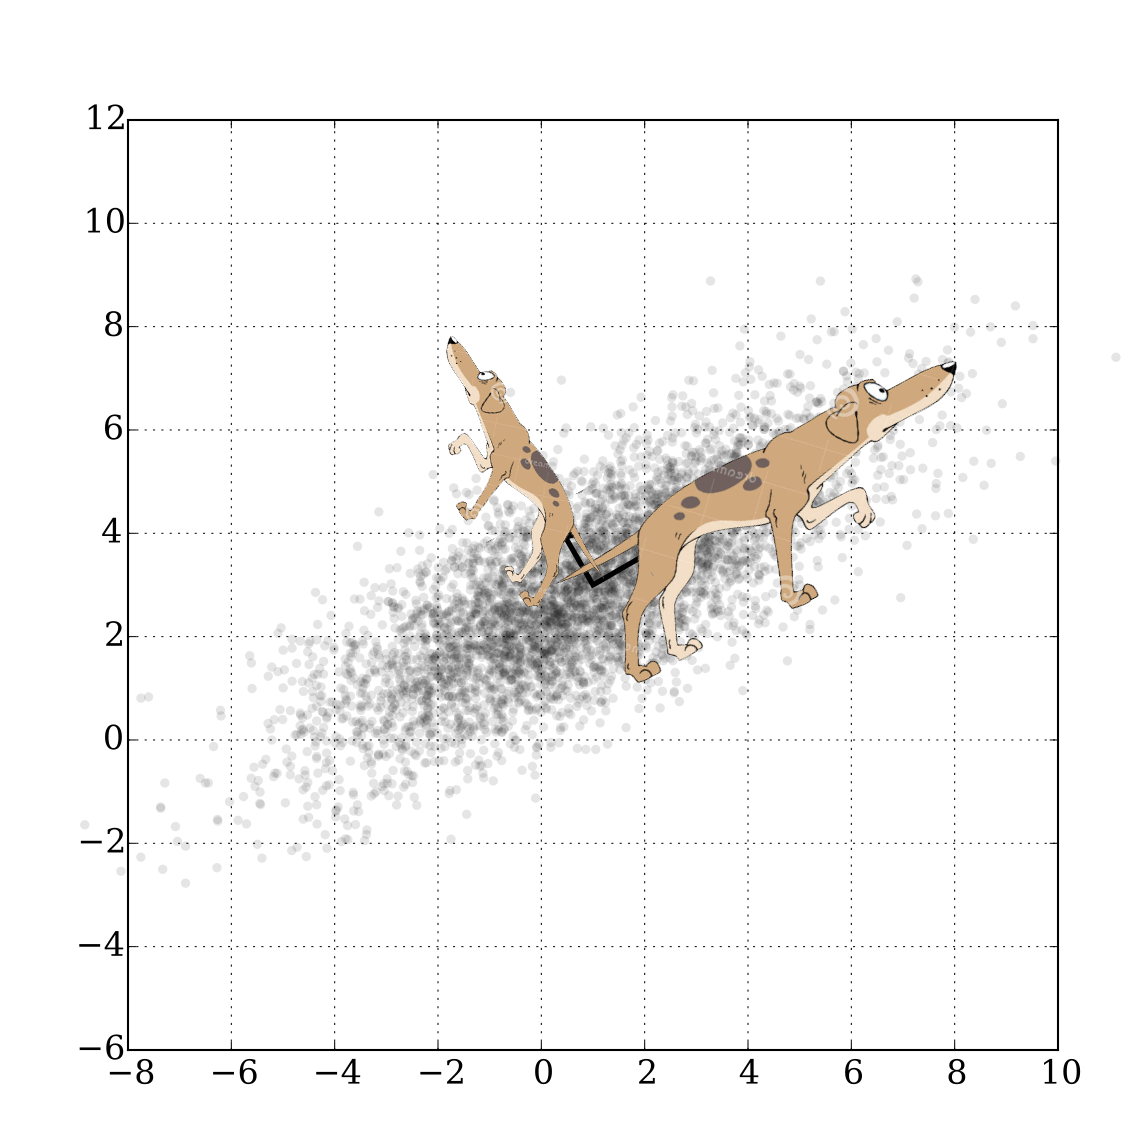

## Imports and Helper Functions

In [1]:
import sklearn
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def show_image(image, h=64, w=64):
    """Helper function to plot a single image"""
    image = image.reshape((h, w))
    image = np.rot90(image, -1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
    
def show_images(images, titles=None, n_row=3, n_col=4, h=64, w=64):
    """Helper function to plot a gallery of images"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    if titles is None:
        titles = ["" for _ in images]
    for i in range(min(n_row * n_col, len(images))):
        plt.subplot(n_row, n_col, i + 1)
        image = images[i]
        image = image.reshape((h, w))
        image = np.rot90(image, -1)
        plt.imshow(image, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

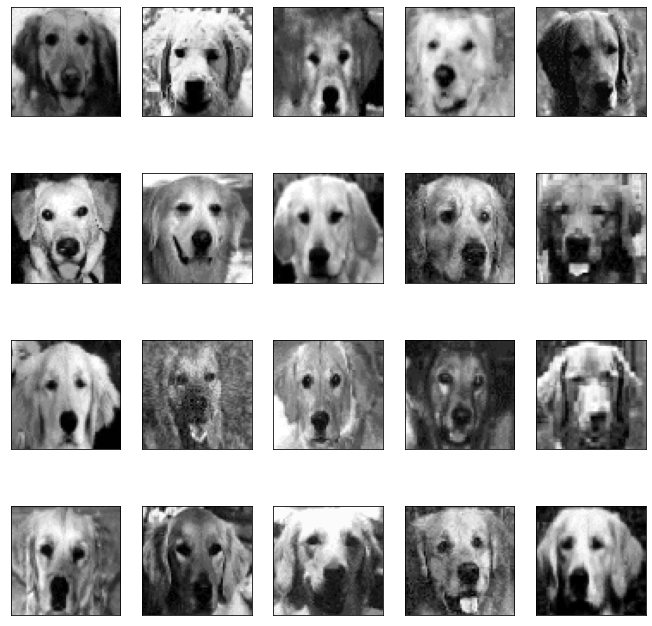

In [2]:
dogs = pd.read_csv('https://raw.githubusercontent.com/bioramble/pca/master/dog.csv', sep=',', header=None).transpose()
dogs
X = dogs.to_numpy()

show_images(X[:20], n_row=4, n_col=5)

In [3]:
print(f"Shape of X: {X.shape}")
print(f"X has {X.shape[0]} dog samples and {X.shape[1]} features per sample")

Shape of X: (80, 4096)
X has 80 dog samples and 4096 features per sample


## Part 1) Center the Data

Recall that in order to perform PCA, we must first center our data. Complete `center_data()` to center the data. Compute the average dog of the dataset, center the data, and plot the average face.

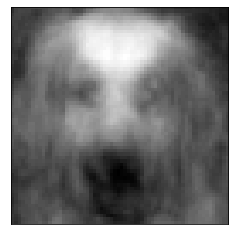

In [4]:
def center_data(X):
    '''
    Inputs:
        - X: n x d data matrix
        
    Outputs:
        - X_center: n x d data matrix with mean zero
        - X_mean: d x 1 vector containing the mean of each feature
    '''
    
    ### YOUR CODE HERE ###
    X_mean = X.mean(axis = 0)
    X_center = X - np.mean(X)
    return X_center, X_mean

X = dogs.to_numpy()
X, X_mean = center_data(X)
show_image(X_mean)

## Part 2) Perform PCA

Complete the steps for PCA by doing the following:

1) Compute the eigenvectors of the covariance matrix X^T X
2) Complete `project()` to project the data matrix into the top k principal components
3) Complete `reconstruct` to reconstruct the data from the the projected data matrix.

You are not allowed to use sklearn's PCA function for this part

<b> Important: </b> We have noticed that there are rare occasions where np.linalg.eig outputs complex eigenvalues and eigenvectors for a matrix that should only have a real eigendecomposition. To prevent this from causing problems, we are only using the real components of the eigendecomposition (this has been done for you already)

<b> Hint: </b> You might find np.linalg.eig useful for computing the eigenvalues and V

In [5]:
'''
In this code block, compute the following:
- eigenvalues: d x 1 vector representing the eigenvalues of X^T X
- V: d x d vector representing the eigenvalues of X^T X

Only take the real components of these valu

Hint: You may find np.linalg.eig useful here
'''

''' Solution '''
eigenvalues, V = np.linalg.eig(np.matmul(X.T, X))
eigenvalues, V = eigenvalues.real, V.real

In [6]:
def project(X, V, k):
    '''
    Perform PCA on the X matrix, and project it down to its top k components
    
    Inputs:
        - X: n x d data matrix with mean zero
        - V: d x d vector representing the eigenvectors of X^T X
        - k: The k principal components to use for projection
        
    Outputs:
        - X_k: n x k data matrix that represents X projected onto its top k principal components
    '''
    
    
    X_k = np.matmul(X, V[:, 1:k])
    return X_k

def reconstruct(X_k, V, k):
    '''
    Reconstruct the data matrix X from the projected matrix X_k using the eigenvectors matrix V
    
    Inputs:
        - X_k: n x k data matrix that represents X projected onto its top k principal components
        - V: d x d vector representing the eigenvectors of X^T X
        - k: The k principal components used to project X onto X_k
    
    Outputs:
        - X_recon: n x d matrix that represents X_k being re-projected into the d-dimensional space
    '''
    
    
    X_recon = np.matmul(X_k, V[:, 1:k].T)
    return X_recon

Plotting reconstructed images using k principal components...


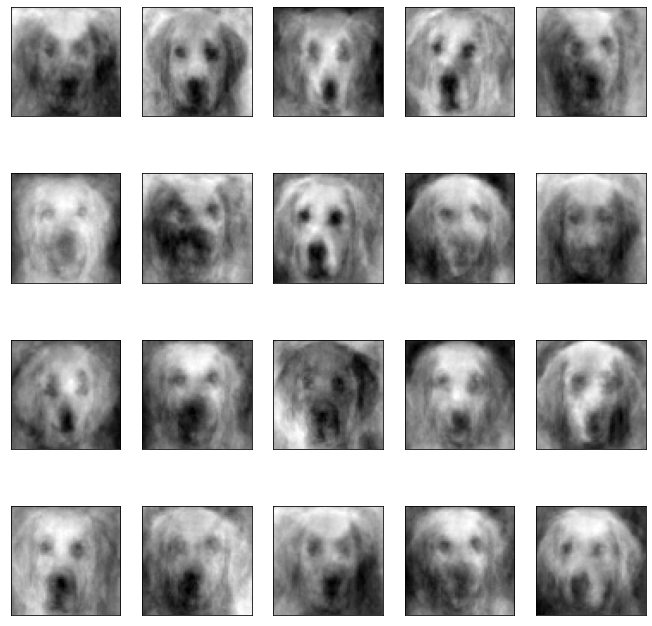

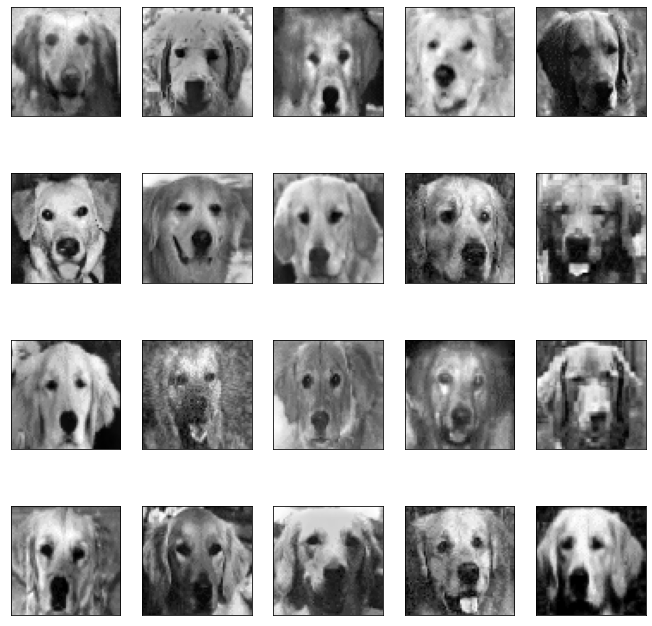

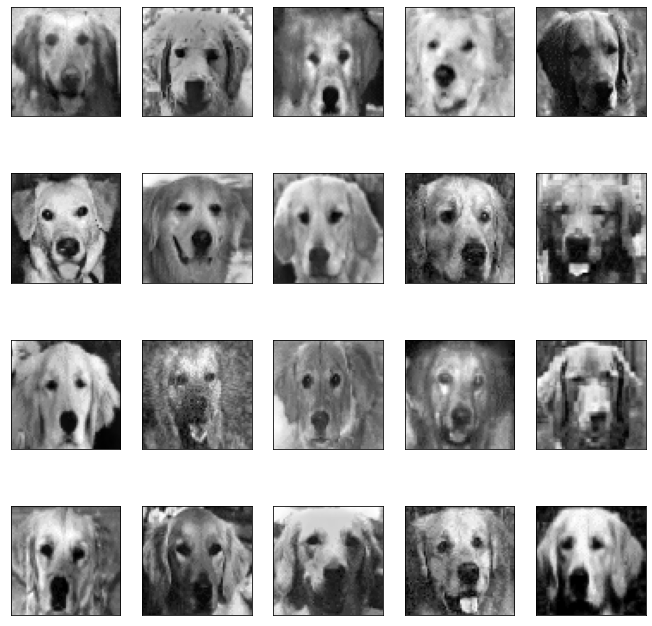

In [7]:
print("Plotting reconstructed images using k principal components...")

for k in [10, 100, 1000]:
    X_k = project(X, V, k)
    X_recon = reconstruct(X_k, V, k)
    fig = show_images(X_recon[:20], n_row=4, n_col=5)

Plotting the Principal Components...


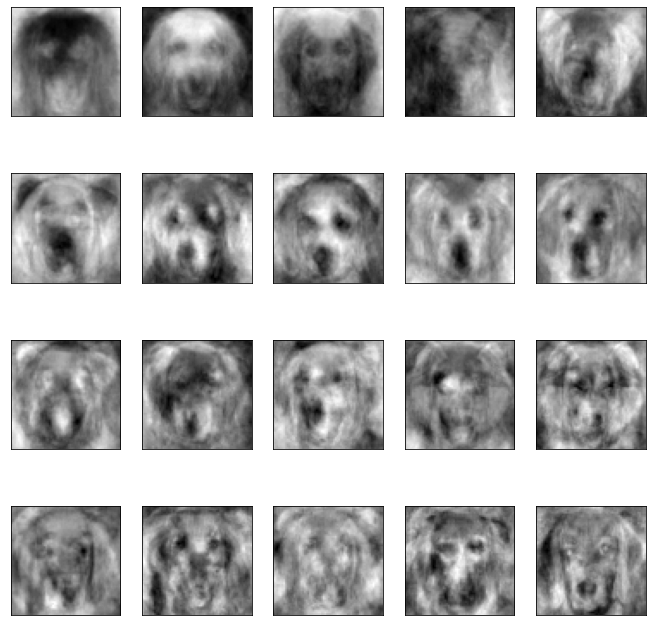

In [8]:
print("Plotting the Principal Components...")
fig = show_images(V.T[:20], n_row=4, n_col=5)

The principal components should have some similarity to dogs! This shows that the principal components can identify the key features in a dog face!

## Part 3) Understanding PCA through percent variance
Now, we will compute the percent variance explained by a certain number of principal components by using the eigenvalues of the covariance matrix. You do not have to write any code for this portion. Answer the questions asked on the homework assignment for part c)

[Text(0, 0.5, 'Percent Variance'), Text(0.5, 0, 'Number of Eigenvalues')]

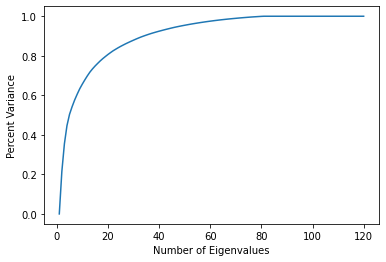

In [9]:
def perc_variance(lam, r):
    return (lam[:r] / lam.sum()).sum()

range_val = 120

perc_vars = np.asarray([perc_variance(eigenvalues, k) for k in range(range_val)])
rank = np.asarray([1 + i for i in range(len(perc_vars))])
fig, ax = plt.subplots()
ax.plot(rank, perc_vars)
ax.set(ylabel="Percent Variance", xlabel="Number of Eigenvalues")

In [10]:
n, d = X.shape
X_train = X[:int(n*0.8)]
X_test = X[int(n*0.8):]
train_errors = []
test_errors = []
max_components = 120

### YOUR CODE HERE ###
print(np.linalg.matrix_rank(X))
print(np.linalg.matrix_rank(np.matmul(X.T, X)))

80
80


1) How many PCs are needed to explain 95% of the variance?
We need 49 eigenvalues to be able to explain around 95% of the variance.

2) What is the rank of the data matrix?
80

3) What is the rank of the covariance matrix?
80

4) Given the rank of the covariance matrix, what is the upper bound on the number of non-zero eigenvalues?
80

5) Explain why your answer to question 1) seems reasonable given the number of non-zero eigenvalues.
Less than 95% of the eignevalues are required because the first "k" eigenvalues explain the majority of the variance and each following eigenvalue has less influence on the variance.

### Congrats on finishing this notebook! Here are some of the key takeaways:

- Principal component analysis is a powerful method to dissect the data and discern the important directions in the data
- Principal component analysis can help us find the good bois in the data :)